# Laboratorio 04 - Regresión Logística

## Task 1.1 - Cargar CSV

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import Regression as reg

In [2]:
# Cargar datos del CSV
data = np.genfromtxt('framingham.csv', delimiter=',',usecols=(0,1,4,5,7,8,9,10,11,14,15), skip_header=True)
# Limpiar la data con NA 
mean = np.nanmean(data, axis=0)	# Calcular la media por cada columna
nan_indices = np.where(np.isnan(data))
data[nan_indices] = np.take(mean, nan_indices[1])	# Reemplazar valores con la media

In [3]:
# Establecer semilla
np.random.seed(0)

In [4]:
# Randomizar la data
np.random.shuffle(data)

## Task 2.2 - Ajustar un modelo logistico plinomial

In [5]:
# Normalizar valores
for i in range(data.shape[1] - 1):
	data[:, i] = (data[:, i] - np.mean(data[:, i])) / np.std(data[:, i])
# Agregar bias
data = np.hstack((np.ones((data.shape[0], 1)), data))

train_data = data[:int(0.4*len(data))]
cv_data = data[int(0.4*len(data)):int(0.8*len(data))]
test_data = data[int(0.8*len(data)):]

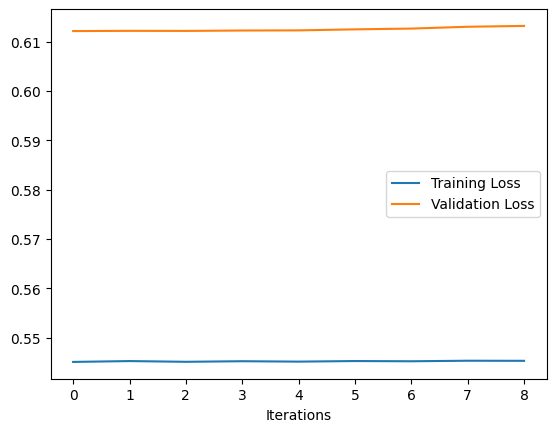

In [7]:
train_losses = []
cv_losses = []

for k in range(1,10):
	data[0] = data[3] ** k
	# J for training data
	X_train = train_data[:, :-1]
	y_train = train_data[:, -1]
	y_train = y_train.reshape(y_train.shape[0], 1)
	theta = np.zeros((X_train.shape[1], 1))
	theta = reg.linear_regression(X_train, y_train, theta, 0.05, 0.002)
	y_pred_train = reg.sigmoid(theta, X_train)
	y_pred_train = np.where(y_pred_train > 0.5, 1, 0)
	loss_train = reg.loss(X_train, y_train, theta)
	train_losses.append(loss_train * 10)
	# J for cross validation data
	X_cv = cv_data[:, :-1]
	y_cv = cv_data[:, -1]
	y_cv = y_cv.reshape(y_cv.shape[0], 1)
	y_pred_cv = reg.sigmoid(theta, X_cv)
	y_pred_cv = np.where(y_pred_cv > 0.5, 1, 0)
	loss_cv = reg.loss(X_cv, y_cv, theta)
	cv_losses.append(loss_cv * 10)
plt.plot(train_losses, label='Training Loss')
plt.plot(cv_losses, label='Validation Loss')
plt.legend()
plt.xlabel("Iterations")
plt.show()

In [8]:
best_k = 3

data[0] = data[3] ** best_k

test_data = data[int(0.8*len(data)):]

# J for test data
X_test = test_data[:, :-1]
y_test = test_data[:, -1]
y_test = y_test.reshape(y_test.shape[0], 1)
theta = np.zeros((X_test.shape[1], 1))
theta = reg.linear_regression(X_test, y_test, theta, 0.05, 0.002)
y_pred_test = reg.sigmoid(theta, X_test)
y_pred_test = np.where(y_pred_test > 0.5, 1, 0)
loss_test = reg.loss(X_test, y_test, theta)
accuracy_test = np.sum(y_pred_test == y_test) / len(y_test)
precision_test = np.sum(y_pred_test[y_test == 1] == 1) / np.sum(y_pred_test == 1)
print("Accuracy for test data: ", accuracy_test)
print("Precision for test data: ", precision_test)
print("Loss for test data: ", loss_test)

Accuracy for test data:  0.8502358490566038
Precision for test data:  0.7
Loss for test data:  0.05823279854445635
